# 🔎 Overview

* **Background** <br>
**Evaluating of loan payback from borrower** is the most difficult for financial institutions. To solve the issue, they want to build the model which is predicted that borrower have ability to repay or not.

* **Goal** <br>
The main objective is **predict whether a borrower will be pay back on loan** based on historical data from financial institutions.

**Key Features**

| Feature | Description | Type
| ------- | ----------- | ---- |
| `id` | Unique of borrower | int |
| `annual_income` | Annual income of borrower | float |
| `debt_to_income_ratio` | ratio of debt in income of borrower (DTI) | float |
| `credit_score` | Score credit of borrower | int |
| `loan_amount` | The total of loan from borrower | float |
| ` interest_rate` | Interest Rate of loan | float |
| `gender` | Gender of borrower | string |
| `marital_status` | Status of marital of borrower | string |
| `education_level` | Level education of borrower | string |
| `employment_status` | Status employment of borrower | string |
| `loan_purpose` | Purpose to lend | string |
| `grade_subgrade` | Grade loan of borrower | string |
| `loan_paid_back` | paid or not (Target Variable) | float |

# 1. Import Library

In [280]:
# Read data
import pandas as pd

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Hypothesis statistic test
from scipy.stats import mannwhitneyu, chi2_contingency

# Feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Metric to evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Other
import numpy as np

In [281]:
class Config:
    figsize = (12, 6)
    train_file = r"dataset\train.csv"
    test_file = r"dataset\test.csv"
    target_variable = "loan_paid_back"

# 2. Load data

In [282]:
train_df = pd.read_csv(Config.train_file)
test_df = pd.read_csv(Config.test_file)

# 3. Data Preview and Info

In [283]:
print(f"[i] Shape of train data: {train_df.shape}")
print(f"[i] Shape of test data: {test_df.shape}")

[i] Shape of train data: (593994, 13)
[i] Shape of test data: (254569, 12)


In [284]:
print(f"[i] First 5 rows in train data:")
display(train_df.head())
print(f"[i] First 5 rows in test data:")
display(test_df.head())

[i] First 5 rows in train data:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


[i] First 5 rows in test data:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [285]:
print("[i] Information of train data:\n")
train_df.info()
print("[i] Information of test data:\n")
test_df.info()

[i] Information of train data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB
[i] Informatio

* **Dataset Size**

* The **training dataset** has `593994` rows and `13` columns, including target variable `loan_paid_back`
* The **testing dataset** has `254569` rows and `12` columns but not including target variable

* **Feature Overview**

* Feature of datasets have two type:
    * **Numerical features:** `id`, `annual_income`, `debt_to_income_ratio`, `credit_score`, `loan_amount`, `interest_rate`
    * **Categorical features:** `gender`, `maritial_status`, `education_level`, `employment_status`, `loan_purpose`, `grade_subgrade`

* **Data consistency**
    * Data types:
        * **Numerical:** `int64` and `float64`
        * **Categorical:** `object (string)`
    * feature `id` is not meaningful for analysis so that we should remove it.

In [286]:
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

## Describe of numerical dataset

In [287]:
print("[i] Describe of numerical train data:")
display(train_df.drop(columns='loan_paid_back').describe().T.style.background_gradient())
print("[i] Describe of numerical test data:")
display(test_df.describe().T.style.background_gradient())

[i] Describe of numerical train data:


,count,mean,std,min,25%,50%,75%,max
annual_income,593994.000000,48212.202976,26711.942078,6002.430000,27934.400000,46557.680000,60981.320000,393381.740000
debt_to_income_ratio,593994.000000,0.120696,0.068573,0.011000,0.072000,0.096000,0.156000,0.627000
credit_score,593994.000000,680.916009,55.424956,395.000000,646.000000,682.000000,719.000000,849.000000
loan_amount,593994.000000,15020.297629,6926.530568,500.090000,10279.620000,15000.220000,18858.580000,48959.950000
interest_rate,593994.000000,12.356345,2.008959,3.200000,10.990000,12.370000,13.680000,20.990000


[i] Describe of numerical test data:


,count,mean,std,min,25%,50%,75%,max
annual_income,254569.000000,48233.080193,26719.658580,6011.770000,27950.300000,46528.980000,61149.440000,380653.940000
debt_to_income_ratio,254569.000000,0.120583,0.068582,0.011000,0.072000,0.096000,0.156000,0.627000
credit_score,254569.000000,681.037691,55.624118,395.000000,646.000000,683.000000,719.000000,849.000000
loan_amount,254569.000000,15016.753484,6922.165182,500.050000,10248.580000,15000.220000,18831.460000,48959.260000
interest_rate,254569.000000,12.352323,2.017602,3.200000,10.980000,12.370000,13.690000,21.290000


* **Analysis**

| Feature | Review |
| ------- | ------ |
| `annual_income` | Average is about 48,000$ But the standard variation is too high (above 26,000$), this is skewed distribution |
| `debt_to_income_ratio` | Average is about 0.12 and data is balance, not skewed |
| `credit_score` | Average is about 680 score. Althrough a little skewed distribution, This is not imbalance like `annual_income` |
| `loan_amount` | Average is about 15,020$ and high skewed |
| `interest_rate` | Average is about 12% |

## Desribe of categorical dataset

In [288]:
# Convert to category
category_columns = ["gender", "marital_status", "education_level", "employment_status", "loan_purpose", "grade_subgrade"]

train_df[category_columns] = train_df[category_columns].astype('category')
test_df[category_columns] = test_df[category_columns].astype('category')

print("[i] Describe of categorical train data:")
display(train_df.describe(include='category').T)
print("[i] Describe of categorical test data:")
display(test_df.describe(include='category').T)

[i] Describe of categorical train data:


,count,unique,top,freq
gender,593994,3,Female,306175
marital_status,593994,4,Single,288843
education_level,593994,5,Bachelor's,279606
employment_status,593994,5,Employed,450645
loan_purpose,593994,8,Debt consolidation,324695
grade_subgrade,593994,30,C3,58695


[i] Describe of categorical test data:


,count,unique,top,freq
gender,254569,3,Female,131480
marital_status,254569,4,Single,123686
education_level,254569,5,Bachelor's,119924
employment_status,254569,5,Employed,193207
loan_purpose,254569,8,Debt consolidation,138963
grade_subgrade,254569,30,C3,25410


* **Analysis**

* Two datasets have number of categories of each features and top category is similar.

| Feature | Review |
| ------- | ------ |
| `gender` | 3 types: `Male`, `Female`, `Other`. Top is **Female** |
| `marital_status` | 4 types: `Signle`, `Married`, `Divorced`, `Widowed`. Top is **Signle** |
| `education_level` | 5 types: `High School`, `Master's`, `Bachelor's`, `PhD`, `Other`. Top is **Bachelor's** |
| `employment_status` | 5 types: `Self-employed`, `Employed`, `Unemployed`, `Retired`, `Student`. Top is **Employed** |
| `loan_purpose` | 8 types: `Debt consolidation`, `Home`, `Education`, `Vacation`, `Car`, `Medical`, `Business`, `Other`. Top is **Debt consolidation** |
| `grade_subgrade` | 30 types: From `A1` to `F5`. Top is **C3** |

# 4. Data Quality Checks

## 4.1 Missing Value

In [289]:
def is_missing_value(df: pd.DataFrame, name:str):
    total_rows = df.shape

    missing_df = df.isna().sum().reset_index()
    missing_df.rename({missing_df.columns[-1]: "Total_missing"}, axis=1, inplace=True)
    
    
    if missing_df.loc[missing_df['Total_missing'] > 0].shape[0] == 0:
        print(f"✅ {name} dataset is not having missing values.")
    else:
        print(f"❌ {name} is having missing values.")
        display(missing_df.loc[missing_df['Total_missing'] > 0])

print("❗ Checking train dataset.....")
is_missing_value(train_df, "train")
print("❗ Checking test dataset.....")
is_missing_value(train_df, "test")

❗ Checking train dataset.....
✅ train dataset is not having missing values.
❗ Checking test dataset.....
✅ test dataset is not having missing values.


## 4.2 Duplicate Value

In [290]:
def is_duplicate(df: pd.DataFrame, name:str):
    duplicate_count = df.duplicated().sum()
    total_rows = df.shape[0]

    if duplicate_count == 0:
        print(f"✅ {name} data is not duplicated.")
    else:
        print(f"❌ {name} data is duplicated.")
        print(f"Rows duplicated: {duplicate_count}/{total_rows}")


print("❗ Checking train dataset.....")
is_duplicate(train_df, "train")
print("❗ Checking test dataset.....")
is_duplicate(test_df, "test")

❗ Checking train dataset.....
✅ train data is not duplicated.
❗ Checking test dataset.....
✅ test data is not duplicated.


## 4.3 Outlier Value

In [291]:
def outlier_value(df:pd.DataFrame, name:str):
    columns = ["annual_income", "debt_to_income_ratio", "credit_score", "loan_amount", "interest_rate"]
    result = {
        "Feature": [],
        "Count Outlier": [],
        "Percent": []
    }

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        #upper bound
        upper_bound = q3 + (1.5 * iqr)

        #lower bound
        lower_bound = q1 - (1.5 * iqr)

        outlier_df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        total_outliers = len(outlier_df)
        total_rows = df.shape[0]

        result["Feature"].append(column)
        result["Count Outlier"].append(total_outliers)
        result["Percent"].append(format((total_outliers / total_rows) * 100, ".2f"))
    
    result_df = pd.DataFrame(result)
    display(result_df)
        
print("❗ Checking train dataset.....")
outlier_value(train_df, "train")
print("❗ Checking test dataset.....")
outlier_value(test_df, "test")

❗ Checking train dataset.....


,Feature,Count Outlier,Percent
0,annual_income,15917,2.68
1,debt_to_income_ratio,17556,2.96
2,credit_score,5901,0.99
3,loan_amount,2902,0.49
4,interest_rate,5136,0.86


❗ Checking test dataset.....


,Feature,Count Outlier,Percent
0,annual_income,6790,2.67
1,debt_to_income_ratio,7560,2.97
2,credit_score,2639,1.04
3,loan_amount,1205,0.47
4,interest_rate,2089,0.82


### **Missing Value**

* Data don't have any missing value

### **Duplicate Value**

* Data don't have any duplicate value

### **Outlier Value**

* Both `train` and `test` data also have outliers in **numerical variable**. But we cannot remove them because they affect the result.

## Conclusion
* Both dataset don't have missing or duplicated value
* Both dataset have outliers

# 5. Exploding Data Analysis

In [292]:
numerical_train_df = train_df[[
    'annual_income',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'interest_rate']]
categorical_train_df = train_df[[
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade']]

numerical_test_df = test_df[[
    'annual_income',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'interest_rate']]
categorical_test_df = test_df[[
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade']]

## 5.1 Loan Distribution

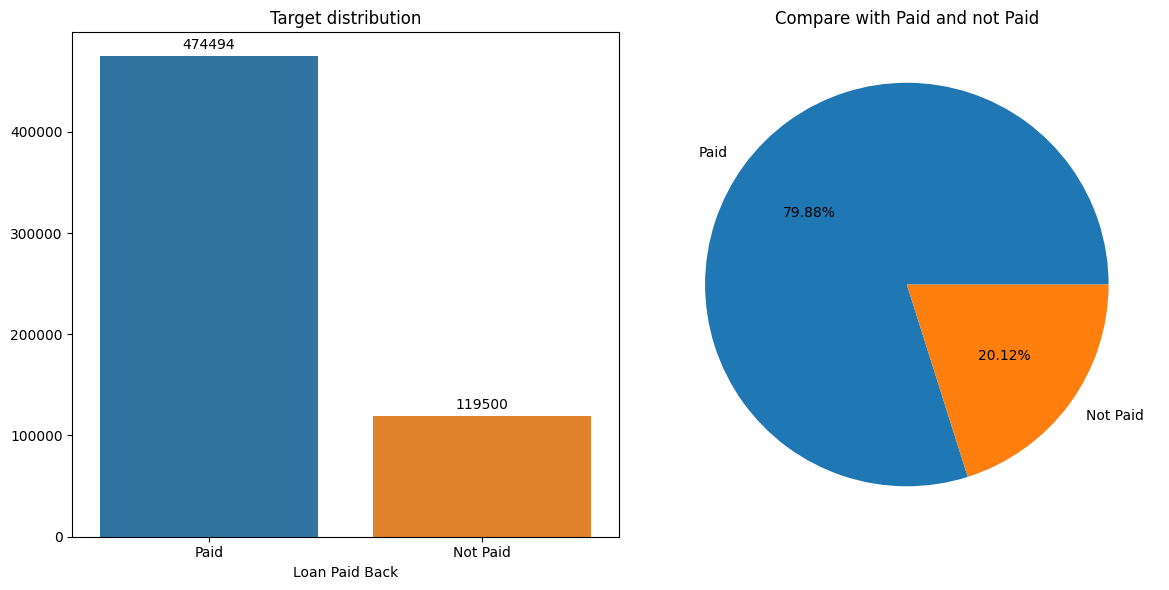

In [293]:
train_df["loan_status"] = train_df["loan_paid_back"].map({
    0: "Not Paid",
    1: "Paid"
})

counts_df = train_df['loan_status'].value_counts().reset_index()
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=Config.figsize)

# axes count distribution
sns.countplot(train_df, x="loan_status", hue="loan_status", ax=ax[0])
ax[0].set_title("Target distribution")
ax[0].set_xlabel("Loan Paid Back")
ax[0].set_ylabel("")
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%d", padding=3)

# axes pie chart
ax[1].pie(counts_df["count"].values, labels=counts_df["loan_status"], autopct="%.2f%%")
ax[1].set_title("Compare with Paid and not Paid")

fig.tight_layout()
plt.show()

### **Analysis**

| Label | Count | Ratio |
| ----- | ----- | ----- |
| `Paid` | 474,494 | 80% |
| `Not Paid` | 119,500 | 20% |

&rarr; Two classes is imbalance

## 5.2 Numerical

C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\3000841286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(boxplot_df, x=col_name, y='Dataset', ax=ax[row, 1], palette=["green", "blue"])
C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\3000841286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(boxplot_df, x=col_name, y='Dataset', ax=ax[row, 1], palette=["green", "blue"])
C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\3000841286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(boxplot_df, x=col_name, y='Dataset', ax=ax[row,

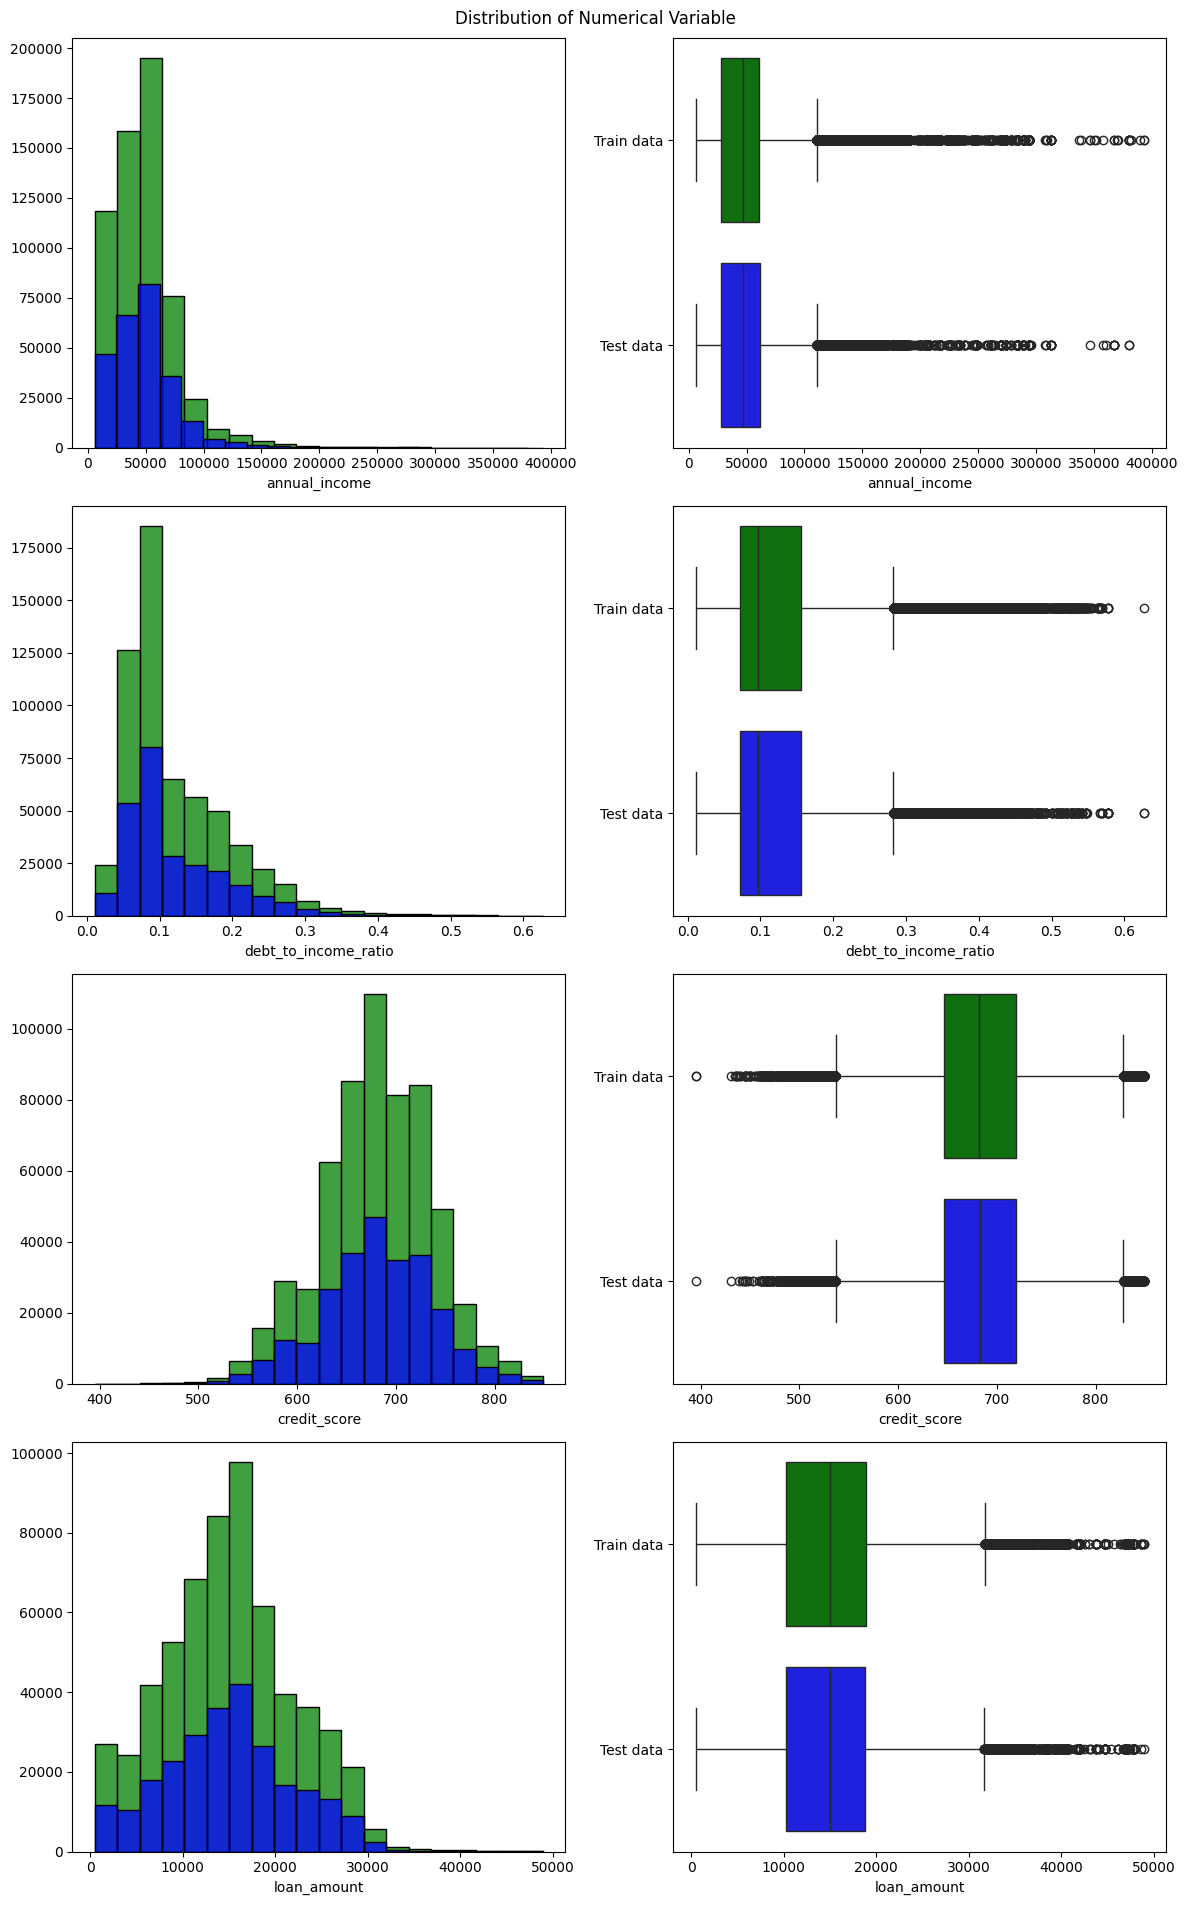

In [294]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(Config.figsize[0], 20))
col_names = list(numerical_train_df.columns)
for row in range(4):
    col_name = col_names.pop(0)
    sns.histplot(numerical_train_df, x=col_name, bins=20, ax=ax[row, 0], label="Train data", color="green")
    sns.histplot(numerical_test_df, x=col_name, bins=20, ax=ax[row, 0], label="Test data", color='blue')
    boxplot_df = pd.concat([
        pd.DataFrame({"Dataset": "Train data", col_name: train_df[col_name]}),
        pd.DataFrame({"Dataset": "Test data", col_name: test_df[col_name]}),
    ])
    sns.boxplot(boxplot_df, x=col_name, y='Dataset', ax=ax[row, 1], palette=["green", "blue"])

fig.suptitle('Distribution of Numerical Variable')

for ax in ax.flat:
    ax.set_ylabel("")

fig.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

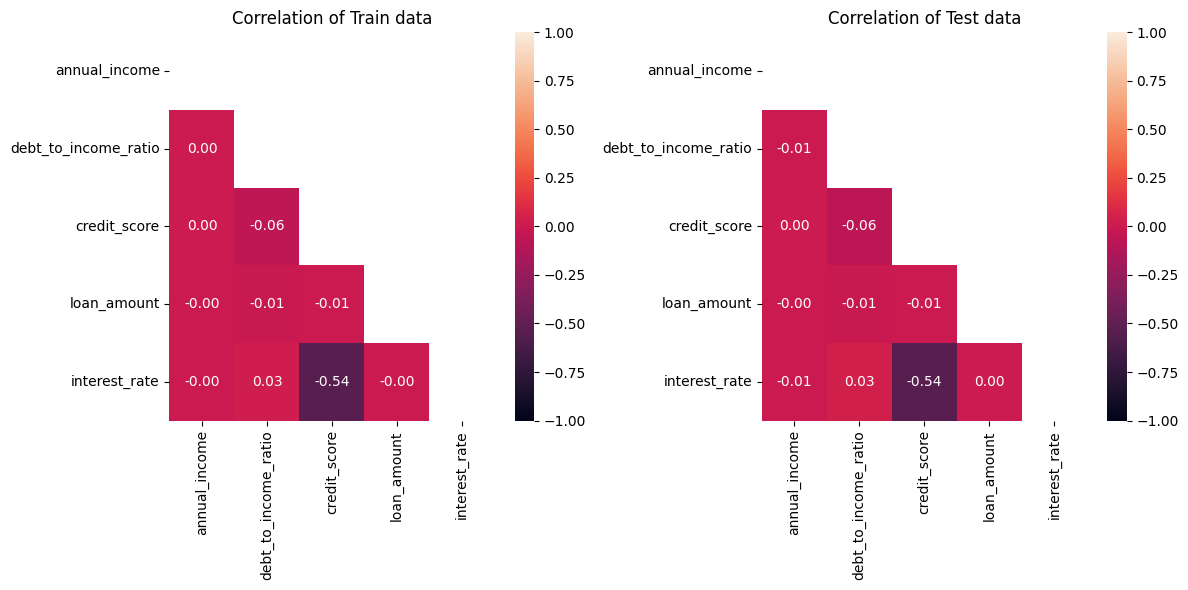

In [295]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=Config.figsize)

train_corr = numerical_train_df.corr()
test_corr = numerical_test_df.corr()

mask_train_corr = np.triu(np.ones_like(train_corr, dtype=bool))
mask_test_corr = np.triu(np.ones_like(test_corr, dtype=bool))

sns.heatmap(train_corr, vmin=-1, vmax=1, mask=mask_train_corr, fmt=".2f", annot=True, ax=ax[0])
sns.heatmap(test_corr, vmin=-1, vmax=1, mask=mask_test_corr, fmt=".2f", annot=True, ax=ax[1])
ax[0].set_title("Correlation of Train data")
ax[1].set_title("Correlation of Test data")

fig.tight_layout()
plt.show()

### **Analysis**

* `Train` and `Test` data is consistency and both similarity.

| Feature | Assessment |
| ------- | ---------- |
| `annual_income` | The data centralize left historgram **(from above `0$` to `100,000$`)**. It means that many borrowers have annual income in low-level. It shows us that mid and high-level borrowers also borrowing but it is small. |
| `debt_to_income_ratio` | The ratio in the left histogram **(from above `0` to `0.2`)**. Many borrowers can able to repaid. Person cannot repaid which is not high. |
| `credit_score` | Similarity with `debt_to_income_ratio` but it is negative. The score **from `600` to about `800`** that is good signal. |
| `loan_amount` | The amount of loan of each person **from above `0$` to `30,000$`**. It means many borrowers lend small amount. |

### **Correlation**

* Only `credit_score` and `interest_rate` is negative correlation, other is low.
* relationship of two features is **negative**. When borrower has **High Credit Score**, the interest rate **will be Low**

## 5.3 Category

In [296]:
categorical_train_df.columns

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\1646675686.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, 0].set_xticklabels(categorical_train_df[col_name].unique(), rotation=45)
C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\1646675686.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, 1].set_xticklabels(categorical_train_df[col_name].unique(), rotation=45)
C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\1646675686.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, 0].set_xticklabels(categorical_train_df[col_name].unique(), rotation=45)
C:\Users\hungm\AppData\Local\Temp\ipykernel_24380\1646675686.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_

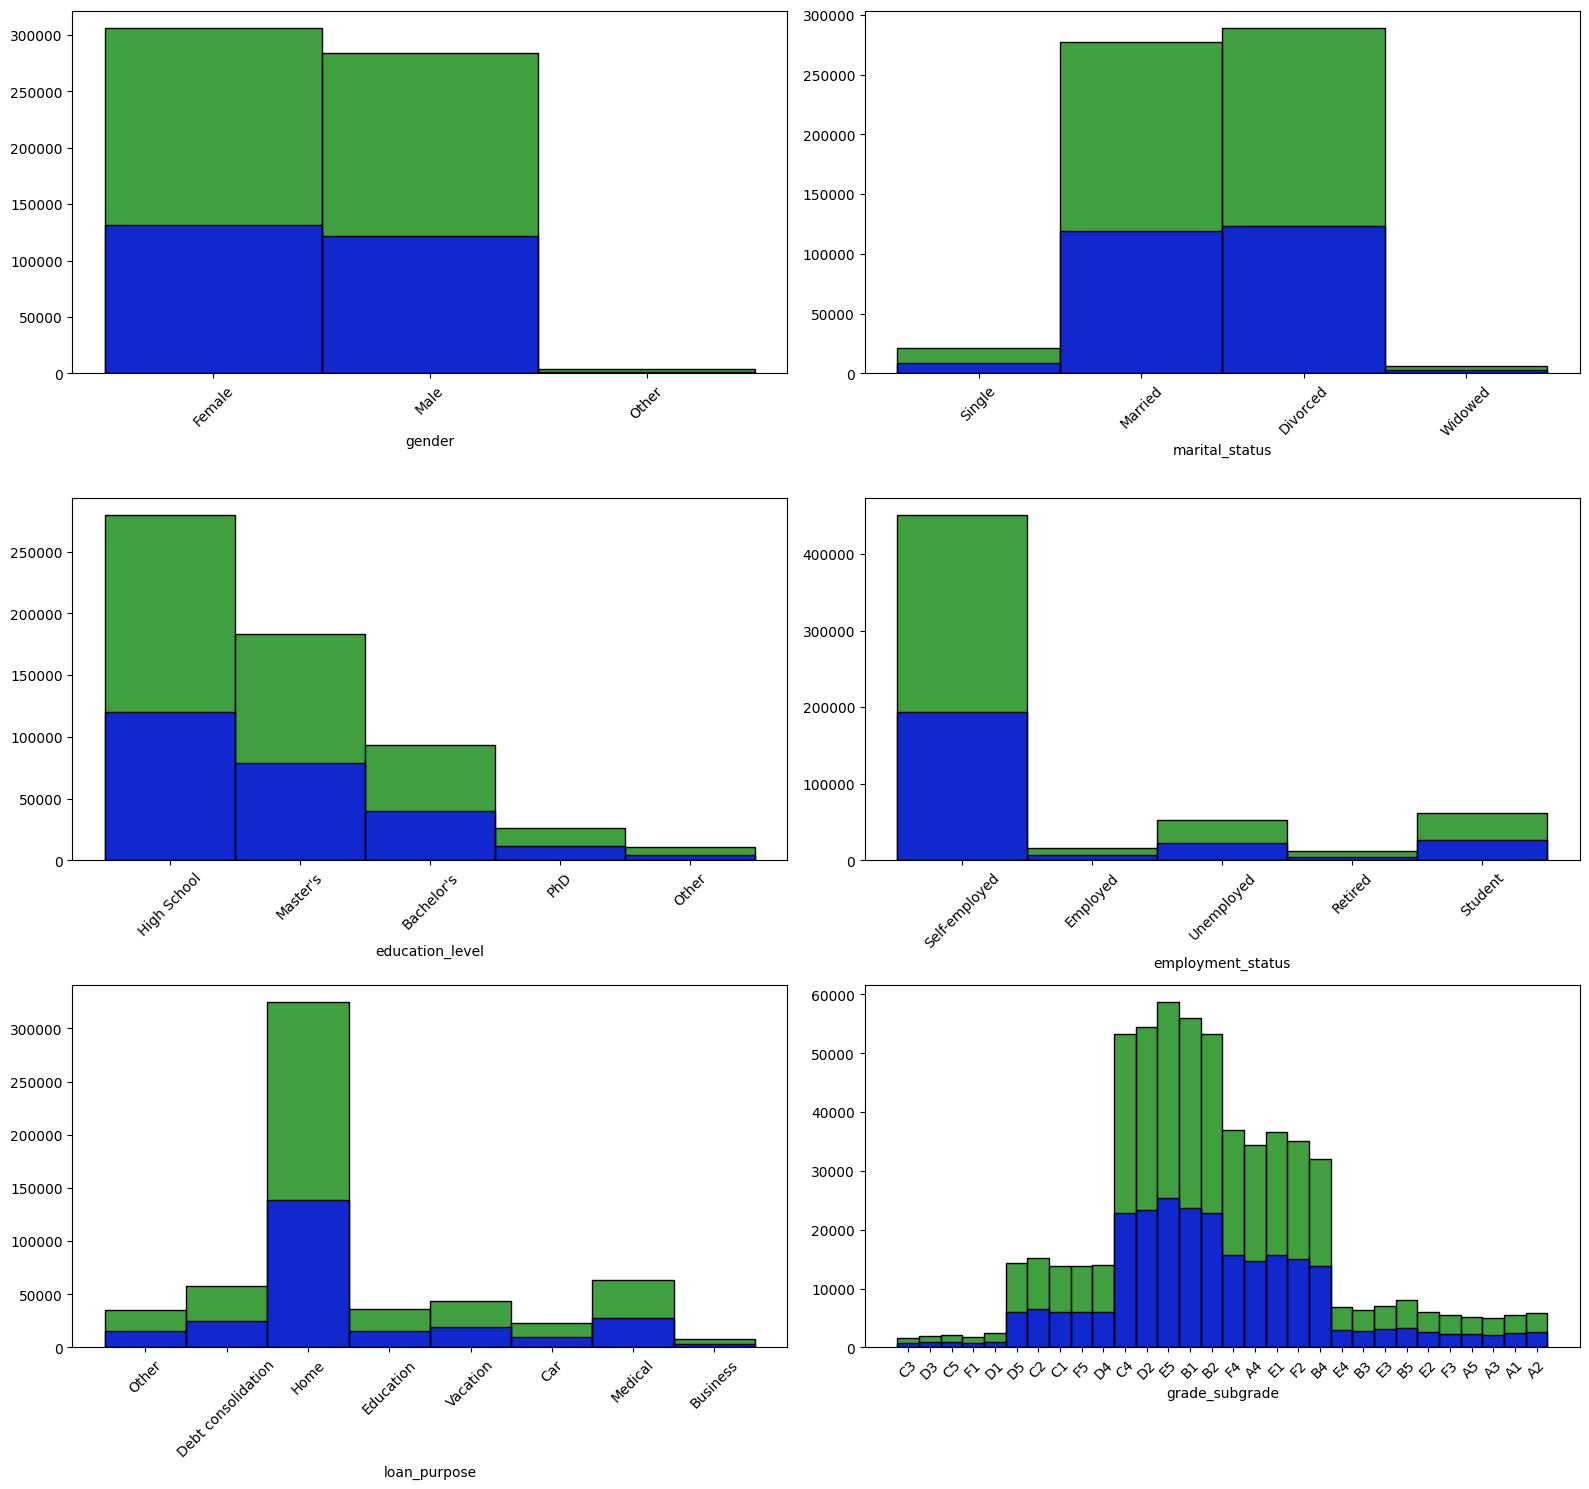

In [297]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
col_names = list(categorical_train_df.columns)

for row in range(3):
    col_name = col_names.pop(0)
    sns.histplot(categorical_train_df, x=col_name, ax=ax[row, 0], label="Train data", color="green")
    sns.histplot(categorical_test_df, x=col_name, ax=ax[row, 0], label="Test data", color="blue")

    ax[row, 0].set_ylabel("")
    ax[row, 0].set_xticklabels(categorical_train_df[col_name].unique(), rotation=45)

    col_name = col_names.pop(0)
    sns.histplot(categorical_train_df, x=col_name, ax=ax[row, 1], label="Train data", color="green")
    sns.histplot(categorical_test_df, x=col_name, ax=ax[row, 1], label="Test data", color="blue")

    ax[row, 1].set_ylabel("")
    ax[row, 1].set_xticklabels(categorical_train_df[col_name].unique(), rotation=45)

fig.tight_layout()
plt.show()

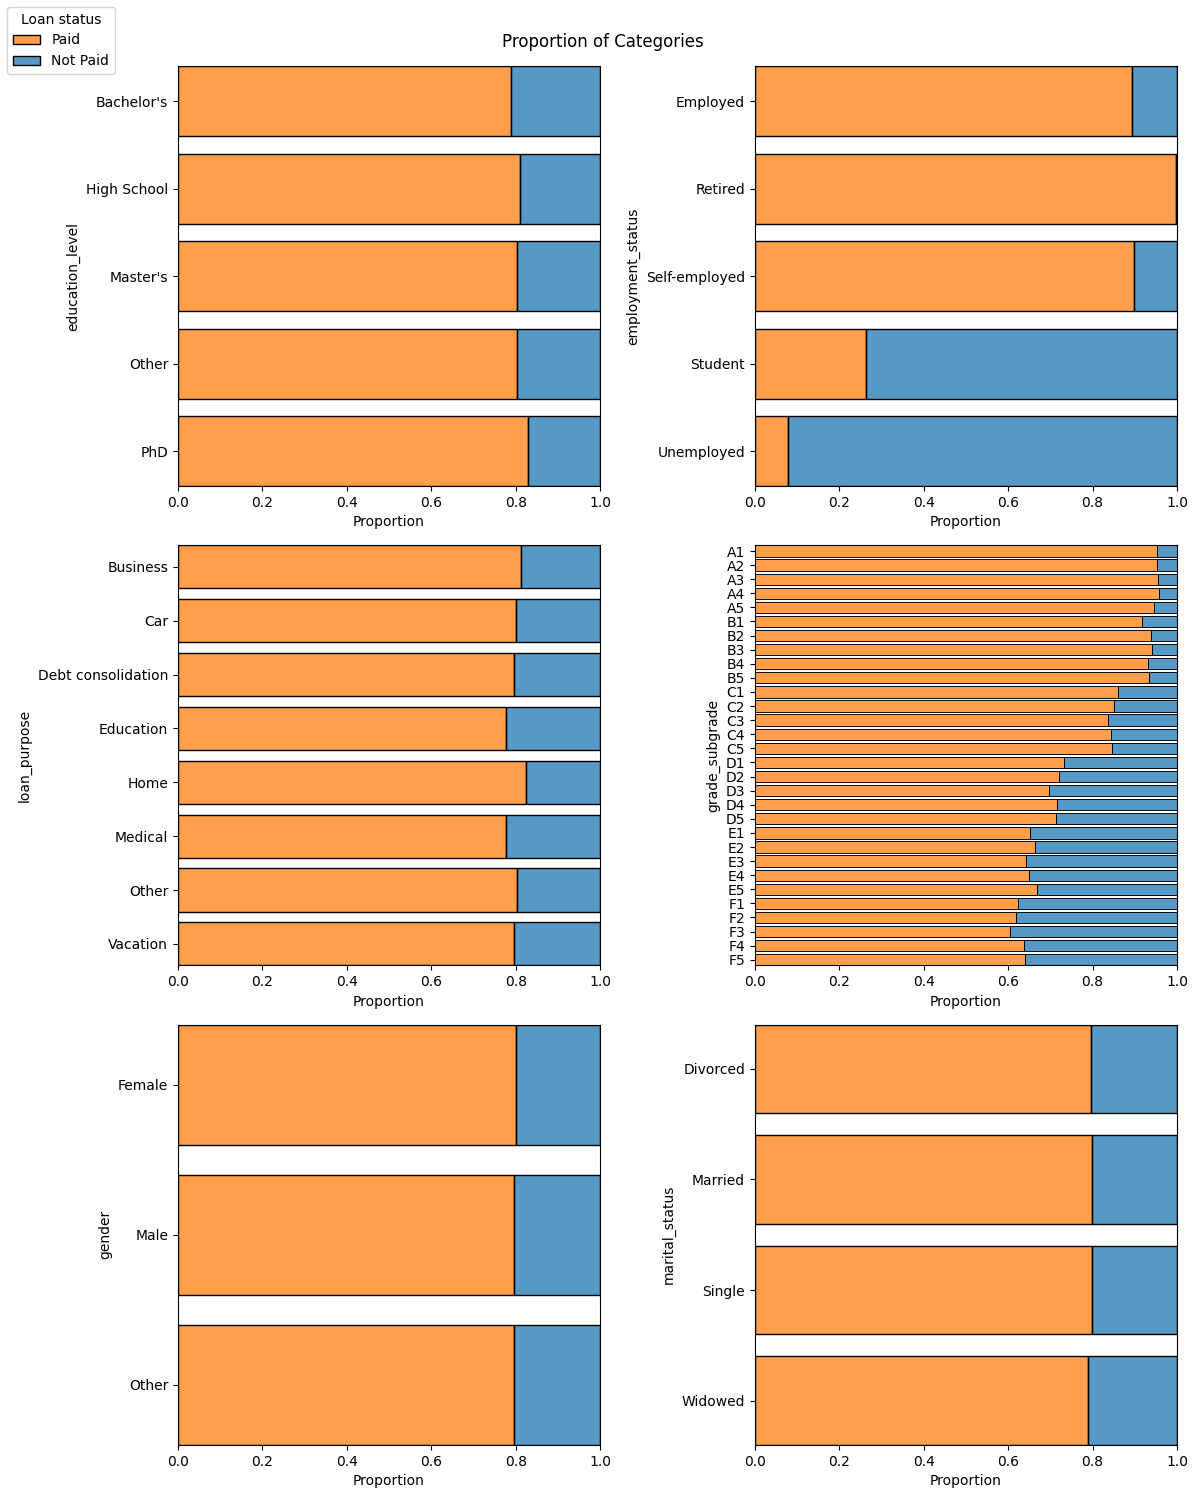

In [298]:
# Stacked Bar
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 15))

stacked_data = train_df.copy().sort_values(by='grade_subgrade')

sns.histplot(stacked_data, y='education_level', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[0, 0],legend=False)
sns.histplot(stacked_data, y='employment_status', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[0, 1],legend=False)
sns.histplot(stacked_data, y='loan_purpose', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[1, 0],legend=False)
sns.histplot(stacked_data, y='grade_subgrade', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[1, 1],legend=False)
sns.histplot(stacked_data, y='gender', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[2, 0],legend=False)
sns.histplot(stacked_data, y='marital_status', hue='loan_paid_back', multiple='fill', stat='proportion', discrete=True, shrink=.8, ax=ax[2, 1],legend=False)

fig.legend(['Paid', 'Not Paid'], loc="upper left", title="Loan status")

fig.suptitle("Proportion of Categories")
fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### **Analysis**

* The count plots of category variables have consistency.

## 5.4 Statistic Hypothesis Test

In [299]:
def numerical_test(dataframe: pd.DataFrame, feature_name:str, target_name="loan_paid_back", significiant_value=0.05):
    group_not_paid = dataframe[dataframe[target_name] == 0.0][feature_name]
    group_paid = dataframe[dataframe[target_name] == 1.0][feature_name]

    stat, p_value = mannwhitneyu(group_not_paid, group_paid)

    if p_value < significiant_value:
        return "Rejected H0"
    else:
        return "Accepted H0"

def chi_square_test(dataframe:pd.DataFrame, feature_name:str, target_name="loan_paid_back", significiant_value=0.05):
    contigency_table = pd.crosstab(dataframe[feature_name], dataframe[target_name])

    res = chi2_contingency(contigency_table)

    if res.pvalue < significiant_value:
        return "Rejected H0"
    else:
        return "Accepted H0"

In [300]:
excepted_target_columns = train_df.drop(columns=['loan_paid_back', 'loan_status']).columns
results = []

for col in excepted_target_columns:
    if train_df[col].dtype.name == "category":
        print(f"Using Chi Square Test for rejected or accepted null Hypothesis: {col} has relative with target values?")
        result = chi_square_test(train_df, col)
        print("-----------------------------------------------")
    else:
        print(f"Using Man Whitney-U Test for rejected or accepted null Hypothesis: {col} has relative with target values?")
        result = numerical_test(train_df, col)
        print("-----------------------------------------------")
    
    if result == "Rejected H0":
        print("Rejected null Hypothesis.")
        results.append(col)
    else:
        print("Accepted null Hypothesis.")
    
    print("\n\n")

Using Man Whitney-U Test for rejected or accepted null Hypothesis: annual_income has relative with target values?
-----------------------------------------------
Rejected null Hypothesis.



Using Man Whitney-U Test for rejected or accepted null Hypothesis: debt_to_income_ratio has relative with target values?
-----------------------------------------------
Rejected null Hypothesis.



Using Man Whitney-U Test for rejected or accepted null Hypothesis: credit_score has relative with target values?
-----------------------------------------------
Rejected null Hypothesis.



Using Man Whitney-U Test for rejected or accepted null Hypothesis: loan_amount has relative with target values?
-----------------------------------------------
Rejected null Hypothesis.



Using Man Whitney-U Test for rejected or accepted null Hypothesis: interest_rate has relative with target values?
-----------------------------------------------
Rejected null Hypothesis.



Using Chi Square Test for rejected or acc

### **Analysis**

* We set the hypothesis: **Do features have relative with target or not?**

* After run the testing, we have conclusion:
    *Almost features have relative with target, just `marital_status` is not. We can drop out `marital_status` because it is a little contribution into data.

# 6. Feature Engineering

In [301]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   annual_income         593994 non-null  float64 
 1   debt_to_income_ratio  593994 non-null  float64 
 2   credit_score          593994 non-null  int64   
 3   loan_amount           593994 non-null  float64 
 4   interest_rate         593994 non-null  float64 
 5   gender                593994 non-null  category
 6   marital_status        593994 non-null  category
 7   education_level       593994 non-null  category
 8   employment_status     593994 non-null  category
 9   loan_purpose          593994 non-null  category
 10  grade_subgrade        593994 non-null  category
 11  loan_paid_back        593994 non-null  float64 
 12  loan_status           593994 non-null  object  
dtypes: category(6), float64(5), int64(1), object(1)
memory usage: 35.1+ MB


In [302]:
def check_skewed(df:pd.DataFrame):
    skewness_dict = {}
    output = {}
    for col in df.columns:
        if df[col].dtype.name != "category" and col != "loan_paid_back":
            skew = df[col].skew()
            skewness_dict[col] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)

    for feature, skewnewss in skew_df.iterrows():
        skewnewss = abs(skewnewss)

        if skewnewss.values > 1:
            output[feature] = skewnewss.values[0]
    return output

def handle_skewed(df: pd.DataFrame):
    skewed_dict = check_skewed(df)
    print("Before Log:")

    for col in skewed_dict.keys():
        print(f"{col:<30} | {skewed_dict[col]}")
        df[col] = np.log(df[col])
    
    new_skewed_dict = check_skewed(df)
    for col in new_skewed_dict.keys():
        print(f"{col:<30} | {new_skewed_dict[col]}")

In [278]:
def pre_proccessing_feature(df:pd.DataFrame):
    le = LabelEncoder()
    
    # Drop unnecessary feature and create new features
    try:
        df.drop(columns=['marital_status', 'loan_status'], inplace=True)
    except KeyError:
        print("Already dropped columns.")
    
    df['loan_to_income']=df['loan_amount']/df['annual_income']
    df['credit_score_to_interest_rate']=df['credit_score']/df['interest_rate']
    df['loan_to_credit_score']=df['loan_amount']/df['credit_score']
    df['total_cost']=df['loan_amount']*df['interest_rate']

    try:
        # Check hypothesis
        excepted_target_columns = df.columns
        results = []

        for col in excepted_target_columns:
            if df[col].dtype.name == "category":
                result = chi_square_test(df, col)
            else:
                result = numerical_test(df, col)
            
            if result == "Rejected H0":
                results.append(col)
            else:
                print(f"{col} is not relative in dataset.")

        print("✅️ Finish checking!")
        print(f"features is kept: {len(results)}/{len(excepted_target_columns)}")
        df = df[results]

        df['loan_paid_back'] = le.fit_transform(df['loan_paid_back'])
    except KeyError:
        print("Cannot test hypothesis (maybe dataset is test).")

    handle_skewed(df)
    print("✅️ Finish handle skewed!")
    # Encoding
    for col in df.columns:
        if df[col].dtype.name == "category":
            df[col] = le.fit_transform(df[col])

    print("✅️ Finish encoding!")
    return df

In [303]:
new_train_df, new_test_df = pre_proccessing_feature(train_df), pre_proccessing_feature(test_df)

✅️ Finish checking!
features is kept: 15/15
Before Log:
loan_to_income                 | 2.3810852282816306
annual_income                  | 1.719508683164502
debt_to_income_ratio           | 1.4066799385489641
credit_score_to_interest_rate  | 1.106498560568952
✅️ Finish handle skewed!
✅️ Finish encoding!
Already dropped columns.
Cannot test hypothesis (maybe dataset is test).
Before Log:
loan_to_income                 | 2.4458532349122883
annual_income                  | 1.7210527141435408
debt_to_income_ratio           | 1.419997145223724
credit_score_to_interest_rate  | 1.1330399321470717
✅️ Finish handle skewed!
✅️ Finish encoding!


# 7. Split Train/Test

In [304]:
X = new_train_df.drop(labels='loan_paid_back', axis=1)
y = new_train_df['loan_paid_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [305]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475195 entries, 88192 to 403803
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   annual_income                  475195 non-null  float64
 1   debt_to_income_ratio           475195 non-null  float64
 2   credit_score                   475195 non-null  int64  
 3   loan_amount                    475195 non-null  float64
 4   interest_rate                  475195 non-null  float64
 5   gender                         475195 non-null  int64  
 6   education_level                475195 non-null  int64  
 7   employment_status              475195 non-null  int64  
 8   loan_purpose                   475195 non-null  int64  
 9   grade_subgrade                 475195 non-null  int64  
 10  loan_to_income                 475195 non-null  float64
 11  credit_score_to_interest_rate  475195 non-null  float64
 12  loan_to_credit_score           

## 7.1 Feature Scaling

In [314]:
scaler = StandardScaler()

column_scales = train_df.select_dtypes(exclude='category').columns.drop(labels='loan_paid_back')

X_train[column_scales] = scaler.fit_transform(X_train[column_scales])
X_test[column_scales] = scaler.transform(X_test[column_scales])

# 8. Metric

## **Precision - Recall Overview**

* **Precision - Recall** evaluates accuracy of model to predict two classes

    * **Precision:** evalutes that based on True Positive (TP) on Total of True Positive (TP) and False Positive (FP)
    * **Recall:** evalutes that based on True Positive (TP) on Total of True Positive (TP) and False Negative (FN)

* **Higher Precision and Recall** &rarr; model seperates `Not Paid` and `Paid` better

# 9. Modeling

## 9.1 Logistic Regression (The Simplest)

In [322]:
model_logistic = LogisticRegression(
    max_iter=1000
)
model_logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [323]:
y_train_pred_logistic = model_logistic.predict(X_train)
y_test_pred_logistic = model_logistic.predict(X_test)

acc_train_logistic = accuracy_score(y_train, y_train_pred_logistic)
acc_test_logistic = accuracy_score(y_test, y_test_pred_logistic)
cf_matrix_logistic = confusion_matrix(y_test, y_test_pred_logistic)
report_logistic = classification_report(y_test, y_test_pred_logistic)

print(f"Accuracy Train: {acc_train_logistic * 100:.2f}%")
print(f"Accuracy Test: {acc_test_logistic * 100:.2f}%")
print("----------------------")
print("Report:")
print(report_logistic)
report_logistic = classification_report(y_test, y_test_pred_logistic, output_dict=True)

Accuracy Train: 88.94%
Accuracy Test: 88.90%
----------------------
Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68     23969
           1       0.90      0.97      0.93     94830

    accuracy                           0.89    118799
   macro avg       0.86      0.78      0.81    118799
weighted avg       0.88      0.89      0.88    118799



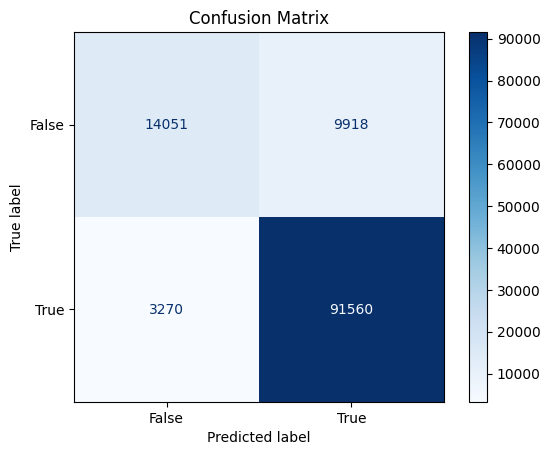

In [324]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_logistic, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 9.2 Ensemble Method

### A. Random Forest

In [325]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [326]:
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
acc_test_rf = accuracy_score(y_test, y_test_pred_rf)
cf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
report_rf = classification_report(y_test, y_test_pred_rf)

print(f"Accuracy Train: {acc_train_rf * 100:.2f}%")
print(f"Accuracy Test: {acc_test_rf * 100:.2f}%")
print("----------------------")
print("Report:")
print(report_rf)
report_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)

Accuracy Train: 100.00%
Accuracy Test: 90.10%
----------------------
Report:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     23969
           1       0.91      0.98      0.94     94830

    accuracy                           0.90    118799
   macro avg       0.89      0.79      0.82    118799
weighted avg       0.90      0.90      0.89    118799



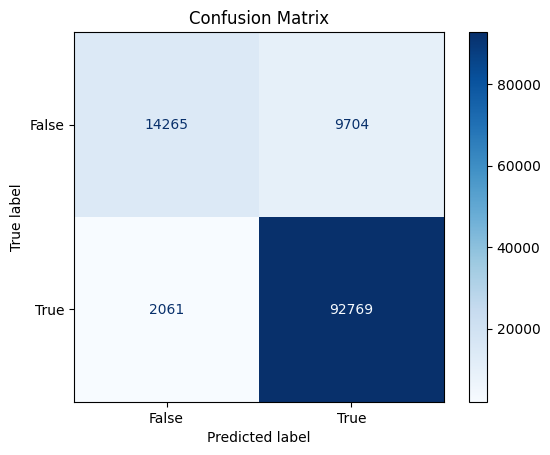

In [327]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_rf, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### B. XGBoost

In [328]:
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_test = xgb.DMatrix(X_test, y_test)

In [329]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'learning_rate': 0.01,
}
n=100
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [330]:
y_test_pred_xgb = np.round(model.predict(xgb_test))
y_train_pred_xgb = np.round(model.predict(xgb_train))

acc_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
cf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
report_xgb = classification_report(y_test, y_test_pred_xgb)

print(f"Accuracy Train: {acc_train_xgb * 100:.2f}%")
print(f"Accuracy Test: {acc_test_xgb * 100:.2f}%")
print("----------------------")
print("Report:")
print(report_xgb)
report_xgb = classification_report(y_test, y_test_pred_xgb, output_dict=True)

Accuracy Train: 90.16%
Accuracy Test: 89.91%
----------------------
Report:
              precision    recall  f1-score   support

           0       0.96      0.52      0.68     23969
           1       0.89      0.99      0.94     94830

    accuracy                           0.90    118799
   macro avg       0.92      0.76      0.81    118799
weighted avg       0.90      0.90      0.89    118799



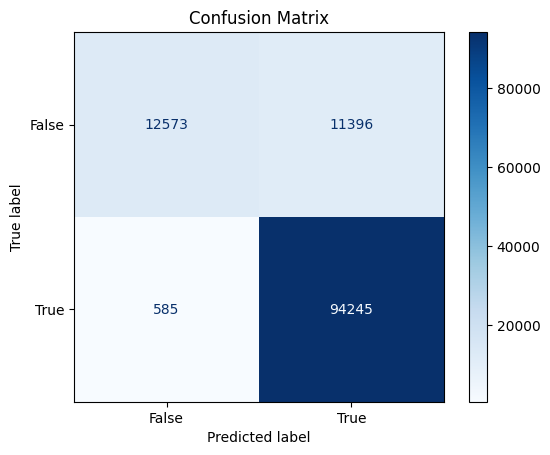

In [331]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_xgb, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 10. Final

In [332]:
result = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Train Accuracy': [acc_train_logistic * 100, acc_train_rf * 100, acc_train_xgb * 100],
    'Test Accuracy': [acc_test_logistic * 100, acc_test_rf * 100, acc_test_xgb * 100],
    'Precision (0)': [report_logistic['0']['precision'] * 100, report_rf['0']['precision'] * 100, report_xgb['0']['precision'] * 100],
    'Recall (0)': [report_logistic['0']['recall'] * 100, report_rf['0']['recall'] * 100, report_xgb['0']['recall'] * 100]
}

df_result = pd.DataFrame(result)

In [333]:
df_melted = df_result.melt(id_vars='Model', var_name='Metric', value_name='Score')
df_melted

,Model,Metric,Score
0,Logistic Regression,Train Accuracy,88.937804
1,Random Forest,Train Accuracy,99.997685
2,XGBoost,Train Accuracy,90.164459
3,Logistic Regression,Test Accuracy,88.898896
4,Random Forest,Test Accuracy,90.096718
5,XGBoost,Test Accuracy,89.914898
6,Logistic Regression,Precision (0),81.121182
7,Random Forest,Precision (0),87.375965
8,XGBoost,Precision (0),95.554036
9,Logistic Regression,Recall (0),58.621553


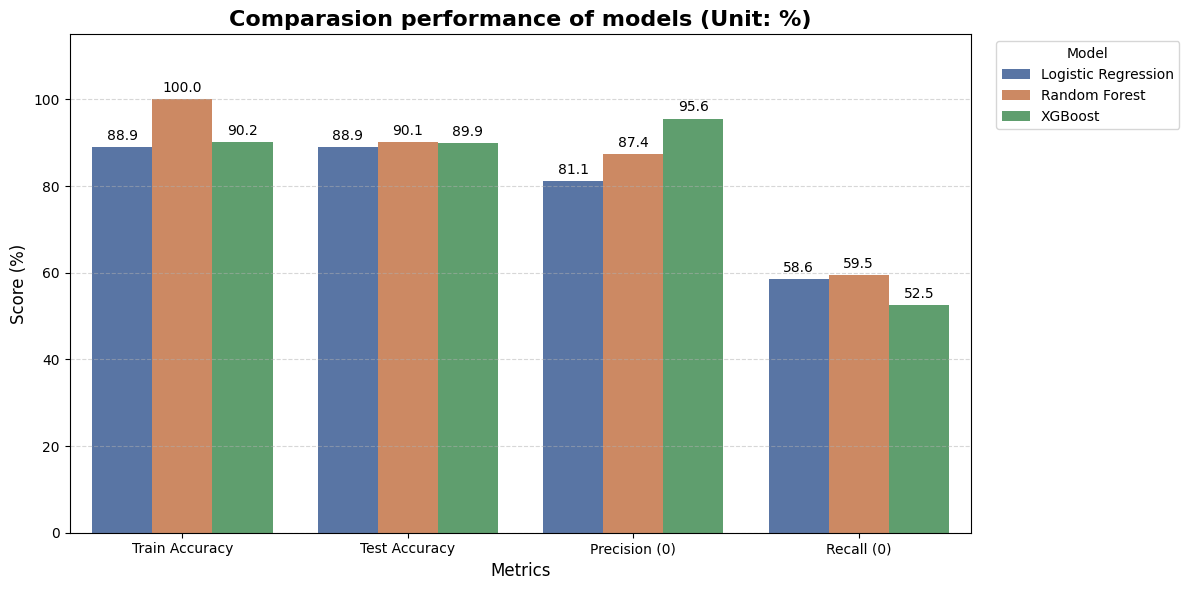

In [334]:
plt.figure(figsize=Config.figsize)

ax = sns.barplot(
    data=df_melted, 
    x='Metric',     # Trục X là tên các cột (Accuracy, Precision...)
    y='Score',      # Trục Y là giá trị điểm số
    hue='Model',    # Chia nhóm màu theo Model
    palette='deep' # Chọn bảng màu đẹp mắt (hoặc dùng 'Set2', 'deep')
)

plt.title('Comparasion performance of models (Unit: %)', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.ylim(0, 115)

# Hiển thị con số cụ thể trên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

# Đưa chú thích (Legend) ra ngoài cho đỡ che biểu đồ
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5) # Thêm lưới ngang mờ

plt.tight_layout()
plt.show()